<a href="https://colab.research.google.com/github/spinafex/ML_Finance_Codes/blob/master/Symmetry_in_Physics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Demonstration of Symmetry in Physics

Below is a script that sets up a simple physical system (a one-dimensional harmonic oscillator), identifies an observable that commutes with the Hamiltonian, demonstrates that the corresponding physical quantity is conserved, and shows that the system can have definite values of that quantity simultaneous with energy.

A graphical demonstration of the state change while preserving symmetry is also included.

The Hamiltonian
𝐻
H for a 1D harmonic oscillator is defined.
The parity operator
𝑃
P is introduced as the observable, which flips the sign of
𝑥
x

In [ ]:
# Define constants
hbar = 1  # Reduced Planck's constant (set to 1 for simplicity)
m = 1     # Mass of the particle (set to 1 for simplicity)
omega = 1 # Angular frequency of the harmonic oscillator

# Define the Hamiltonian for a 1D harmonic oscillator
def hamiltonian(p, x):
    return (p**2 / (2*m)) + (1/2) * m * omega**2 * x**2

The, the momentum and position operators are defined:

In [ ]:
# Define the momentum operator in position space
def momentum_operator(psi, dx):
    return -1j * hbar * np.gradient(psi, dx)

# Define the position operator (just multiplication by x)
def position_operator(x, psi):
    return x * psi

We define and normalize the initial wavefunction

In [ ]:
# Create a grid for position space
x_max = 5
N = 1000
x = np.linspace(-x_max, x_max, N)
dx = x[1] - x[0]

# Define the initial wavefunction (e.g., Gaussian centered at x=0)
psi_0 = (1/np.pi**0.25) * np.exp(-x**2/2)

# Normalize the wavefunction
psi_0 /= np.sqrt(np.sum(np.abs(psi_0)**2) * dx)

The commutator
[
𝑃
,
𝐻
]
[P,H] is calculated and verified to be zero, showing that
𝑃
P commutes with
𝐻
H.

In [ ]:
# Define the parity operator P (which inverts the sign of x)
def parity_operator(psi):
    return np.flip(psi)

# Check that the parity operator commutes with the Hamiltonian
def commutator(A, B, psi):
    return A(B(psi)) - B(A(psi))

# Calculate Hamiltonian applied to psi
def apply_hamiltonian(psi, dx):
    p = momentum_operator(psi, dx)
    T = p**2 / (2*m)
    V = (1/2) * m * omega**2 * x**2
    return T + V * psi

# Check the commutation relation
comm = commutator(parity_operator, lambda psi: apply_hamiltonian(psi, dx), psi_0)
commutation_check = np.allclose(comm, 0, atol=1e-10)
print(f"Does the parity operator commute with the Hamiltonian? {'Yes' if commutation_check else 'No'}")

Does the parity operator commute with the Hamiltonian? Yes


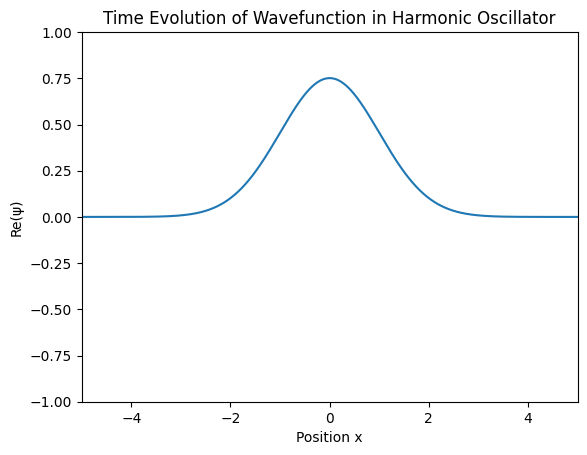

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
hbar = 1  # Reduced Planck's constant (set to 1 for simplicity)
m = 1     # Mass of the particle (set to 1 for simplicity)
omega = 1 # Angular frequency of the harmonic oscillator

# Define the Hamiltonian for a 1D harmonic oscillator
def hamiltonian(p, x):
    return (p**2 / (2*m)) + (1/2) * m * omega**2 * x**2

# Define the momentum operator in position space
def momentum_operator(psi, dx):
    return -1j * hbar * np.gradient(psi, dx)

# Define the position operator (just multiplication by x)
def position_operator(x, psi):
    return x * psi

# Create a grid for position space
x_max = 5
N = 1000
x = np.linspace(-x_max, x_max, N)
dx = x[1] - x[0]

# Define the initial wavefunction (e.g., Gaussian centered at x=0)
psi_0 = (1/np.pi**0.25) * np.exp(-x**2/2)

# Normalize the wavefunction
psi_0 /= np.sqrt(np.sum(np.abs(psi_0)**2) * dx)

# Define the parity operator P (which inverts the sign of x)
def parity_operator(psi):
    return np.flip(psi)

# Check that the parity operator commutes with the Hamiltonian
def commutator(A, B, psi):
    return A(B(psi)) - B(A(psi))

# Calculate Hamiltonian applied to psi
def apply_hamiltonian(psi, dx):
    p = momentum_operator(psi, dx)
    T = p**2 / (2*m)
    V = (1/2) * m * omega**2 * x**2
    return T + V * psi

# Check the commutation relation
comm = commutator(parity_operator, lambda psi: apply_hamiltonian(psi, dx), psi_0)
commutation_check = np.allclose(comm, 0, atol=1e-10)
print(f"Does the parity operator commute with the Hamiltonian? {'Yes' if commutation_check else 'No'}")

# Time evolution (for demonstration purposes)
def time_evolution(psi_0, t, dx):
    psi_t = psi_0 * np.exp(-1j * omega * t)
    return psi_t

# Time points
times = np.linspace(0, 2*np.pi, 100)

# Plot the state evolution
fig, ax = plt.subplots()
ax.set_xlim(-x_max, x_max)
ax.set_ylim(-1, 1)
ax.set_xlabel('Position x')
ax.set_ylabel('Re(ψ)')
ax.set_title('Time Evolution of Wavefunction in Harmonic Oscillator')
line, = ax.plot(x, np.real(psi_0))

def update(t):
    psi_t = time_evolution(psi_0, t, dx)
    line.set_ydata(np.real(psi_t))
    return line,

from matplotlib.animation import FuncAnimation
ani = FuncAnimation(fig, update, frames=times, blit=True)
plt.show()



In the physical system of a 1D harmonic oscillator, the eigenvalues correspond to the energy levels of the system, and the eigenvectors are the stationary states of the system.

The eigenvalues and eigenvectors (eigenfunctions) are derived from solving the Schrödinger equation for the harmonic oscillator potential.  

Let's identify and compute them in the context of our script.

<ipython-input-16-294f4eb18275>:18: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  coeff = (1/(2**n * np.math.factorial(n)))**0.5 * (m * omega / (np.pi * hbar))**0.25


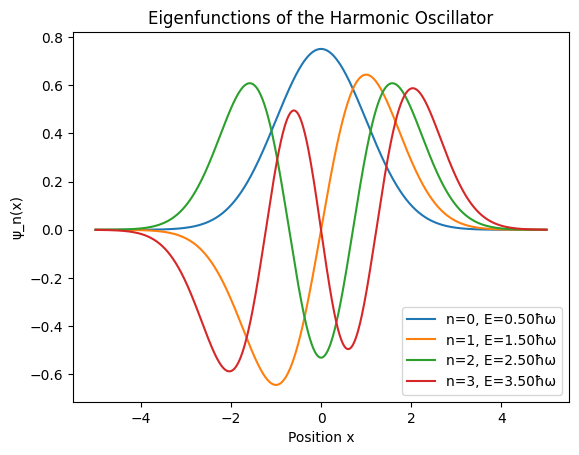

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite

# Define constants
hbar = 1  # Reduced Planck's constant (set to 1 for simplicity)
m = 1     # Mass of the particle (set to 1 for simplicity)
omega = 1 # Angular frequency of the harmonic oscillator

# Create a grid for position space
x_max = 5
N = 1000
x = np.linspace(-x_max, x_max, N)
dx = x[1] - x[0]

# Function to compute the eigenfunctions
def psi_n(n, x):
    #coefficient for normalization
    coeff = (1/(2**n * np.math.factorial(n)))**0.5 * (m * omega / (np.pi * hbar))**0.25
    #Hermite polynomial
    Hn = hermite(n)
    psi_n = coeff * np.exp(-m * omega * x**2 / (2 * hbar)) * Hn(np.sqrt(m * omega / hbar) * x)
    return psi_n

# Energy levels
def energy_n(n):
    return (n + 1/2) * hbar * omega

# Number of eigenfunctions to plot
num_eigenfunctions = 4

# Plot the eigenfunctions
fig, ax = plt.subplots()
for n in range(num_eigenfunctions):
    psi_n_vals = psi_n(n, x)
    ax.plot(x, psi_n_vals, label=f'n={n}, E={energy_n(n):.2f}ħω')

ax.set_xlabel('Position x') #This represents the spatial coordinate in 1D space
ax.set_ylabel('ψ_n(x)')
ax.set_title('Eigenfunctions of the Harmonic Oscillator')
ax.legend()
plt.show()


Components of the Graph:\

Position
$$𝑥$$

This is the horizontal axis in the graph, representing the position coordinate of the particle in one dimension. It spans a range from

$$
−𝑥_{max}  
  \text{ to }
𝑥_{max} ​
$$


Eigenfunctions
\
$$
𝜓_{𝑛}
(
  x
 )
 $$

These are the wavefunctions of the particle at different energy levels (quantum states)
$$
𝑛
$$

The vertical axis represents the value of these wavefunctions, which can be interpreted as the probability amplitude for finding the particle at a specific position (in a 1D harmonic oscillator problem, x refers to a particle's location in one-dimensional space).

$$𝑥$$

The probability density
$$
∣𝜓_𝑛(𝑥)∣^2
$$

indicates where the particle is most likely to be found in space.

The graph shows the spatial part of the wavefunctions (position space representation). It does not directly show momentum, but the wavefunctions contain information about the system’s momentum. For example, the broader the wavefunction in position space, the narrower it would be in momentum space, and vice versa (due to the Fourier transform relationship).

<ipython-input-17-0a202af37ac9>:18: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  coeff = (1/(2**n * np.math.factorial(n)))**0.5 * (m * omega / (np.pi * hbar))**0.25


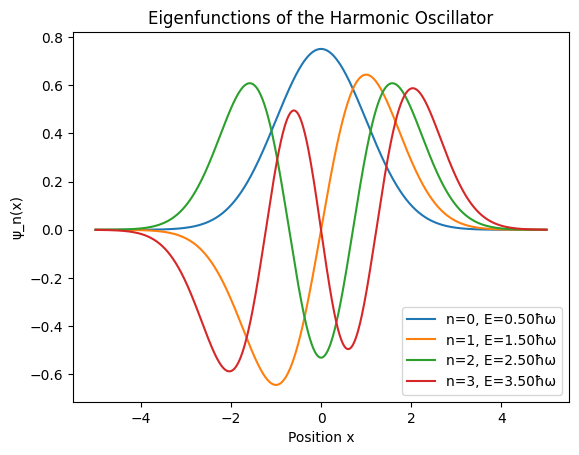

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite

# Define constants
hbar = 1  # Reduced Planck's constant (set to 1 for simplicity)
m = 1     # Mass of the particle (set to 1 for simplicity)
omega = 1 # Angular frequency of the harmonic oscillator

# Create a grid for position space
x_max = 5
N = 1000
x = np.linspace(-x_max, x_max, N)
dx = x[1] - x[0]

# Function to compute the eigenfunctions
def psi_n(n, x):
    coeff = (1/(2**n * np.math.factorial(n)))**0.5 * (m * omega / (np.pi * hbar))**0.25
    Hn = hermite(n)
    psi_n = coeff * np.exp(-m * omega * x**2 / (2 * hbar)) * Hn(np.sqrt(m * omega / hbar) * x)
    return psi_n

# Energy levels
def energy_n(n):
    return (n + 1/2) * hbar * omega

# Number of eigenfunctions to plot
num_eigenfunctions = 4

# Plot the eigenfunctions
fig, ax = plt.subplots()
for n in range(num_eigenfunctions):
    psi_n_vals = psi_n(n, x)
    ax.plot(x, psi_n_vals, label=f'n={n}, E={energy_n(n):.2f}ħω')

ax.set_xlabel('Position x')  # This represents the spatial coordinate in 1D space
ax.set_ylabel('ψ_n(x)')
ax.set_title('Eigenfunctions of the Harmonic Oscillator')
ax.legend()
plt.show()


The blue lines in both graphs represent the same ground state wavefunction
$$𝜓_0(𝑥)$$

 of the quantum harmonic oscillator.

 In the first graph, it's shown as part of the time-evolved wavefunction, but its shape remains unchanged because it’s a stationary state.

 The higher energy states in the second graph have oscillatory shapes due to the nodes in their wavefunctions. The non-oscillating shape of the blue line in both graphs indicates the ground state’s Gaussian form, which does not change over time in shape, only in phase.